# Proyecto 03 - Sistemas de Recomendación

## Dataset: STEAM

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Son dos archivos, uno de calificaciones y otro de información sobre los juegos.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset. Sin embargo, **deberás** modificarlas para hacer un mejor manejo de datos. Algunas cosas a las que deberás prestar atención (tal vez no a todas):
1. Tipos de datos: elige tipos de datos apropiados para cada columna.
2. Descartar columnas poco informativas.
3. Guardar en memoria datasets preprocesados para no tener que repetir código que tarde en correr.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿cuáles son los juegos más populares?¿Y los menos populares?

### Filtro Colaborativo

Deberás implementar un sistema de recomendación colaborativo para este dataset. Ten en cuenta:

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.

Puedes implementar un filtro colaborativo a partir de la similitud coseno o índice de Jaccard. ¿Puedes utilizar los métodos de la librería Surprise? Si no es así, busca implementaciones (por ejemplo, nuevas librerías) que sean apropiadas.

Para comenzar a trabajar, puedes asumir que cada entrada es un enlace entre una persona usuaria y un item, **independientemente** de si la crítica es buena o mala. 

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo harías para ponerle un valor a la calificación?
1. ¿Cómo harías para agregar contenido? Por ejemplo, cuentas con el género, precio, fecha de lanzamiento y más información de los juegos.
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [1]:
import gzip
import pandas as pd

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

**Reviews**

In [2]:
contador = 0
data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
n = 7
for l in parse('steam_reviews.json.gz'):
    if contador%n == 0:
        data_reviews.append(l)
    else:
        pass
    contador += 1

data_reviews = pd.DataFrame(data_reviews)
data_reviews.head(3)

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,found_funny,compensation
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,Sneaky_Panda,0.6,243.0,725280,3,2017-11-27,If you take a discount - it's not a bad horror...,False,1,NaN,NaN,NaN
2,Coby,8.9,227.0,35140,3,2018-01-03,Finished the game around 6 hours. Thats only t...,False,1,NaN,NaN,NaN


**Games**

In [3]:
data_games = []
for l in parse('steam_games.json.gz'):
    data_games.append(l)
data_games = pd.DataFrame(data_games)

print(data_games.shape)
print(data_reviews.shape)
data_games.metascore = data_games.metascore.dropna()
data_reviews.user_id = data_reviews.user_id.dropna()
print(data_games.shape)
print(data_reviews.shape)

(32135, 16)
(1113296, 12)
(32135, 16)
(1113296, 12)


<font color=blue>

### Pendiente: Crear y subir repositorio GIT

In [4]:
import time

match = pd.DataFrame(columns=['publisher','genres','app_name','title','total_hours_played','url','release_date','tags','discount_price','reviews_url','specs','price','early_access','id','developer','sentiment','metascore']  )
#for i in range(1,len(data_reviews)):
for i in range(0,100):
    print(i, end="\r")
    time.sleep(0.1)
    match_id=data_reviews[data_reviews.hours > 5].product_id.value_counts().index[i]
    match=match.append(data_games[data_games.id==match_id])
    match['total_hours_played'].iloc[i]=data_reviews[data_reviews.product_id == str(match_id)].product_id.astype(int).sum()

match.head(3)

,publisher,genres,app_name,title,total_hours_played,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
31856,Valve,"[Action, Free to Play]",Team Fortress 2,Team Fortress 2,11502040,http://store.steampowered.com/app/440/Team_For...,2007-10-10,"[Free to Play, Multiplayer, FPS, Action, Shoot...",NaN,http://steamcommunity.com/app/440/reviews/?bro...,"[Multi-player, Cross-Platform Multiplayer, Ste...",Free to Play,False,440,Valve,Very Positive,92
29692,Facepunch Studios,"[Action, Adventure, Indie, Massively Multiplay...",Rust,Rust,3696958580,http://store.steampowered.com/app/252490/Rust/,2013-12-11,"[Early Access, Survival, Crafting, Multiplayer...",NaN,http://steamcommunity.com/app/252490/reviews/?...,"[Multi-player, MMO, Cross-Platform Multiplayer...",19.99,True,252490,Facepunch Studios,Very Positive,NaN
30746,"2K Games, Aspyr (Mac &amp;amp; Linux)","[Action, RPG]",Borderlands 2,Borderlands 2,513918560,http://store.steampowered.com/app/49520/Border...,2012-09-17,"[FPS, Co-op, Action, RPG, Loot, Shooter, Open ...",NaN,http://steamcommunity.com/app/49520/reviews/?b...,"[Single-player, Co-op, Steam Achievements, Ful...",19.99,False,49520,"Gearbox Software,Aspyr (Mac &amp; Linux)",Overwhelmingly Positive,89


### ¿Cuántos usuarios únicos hay?

In [5]:
len(data_reviews.user_id)

1113296

### ¿Cuántos juegos calificó cada usuario?

In [6]:
data_reviews.username.value_counts()

123               304
Alex              249
Nick              218
Chris             189
..                182
                 ... 
Astrowizard         1
SDE                 1
Admiral Caesar      1
Brussells           1
Dodger442           1
Name: username, Length: 713170, dtype: int64

### ¿cuáles son los juegos más populares?¿Y los menos populares?

In [7]:
# Los 10 más populares
for i in range(0,9):
    print(data_games[data_games.id==str(data_reviews.product_id.value_counts().index[i])].title.values)

['Team Fortress 2']
['Rust']
['Borderlands 2']
['Fallout 4']
['Grand Theft Auto V']
['Undertale']
['Portal 2']
['DayZ']
['Warframe']


In [8]:
# Los 10 menos populares
for i in range(0,9):
    print(data_games[data_games.id==str(data_reviews.product_id.value_counts(ascending=True).index[i])].title.values)

['BERSERK: The Golden Age Arc I - The Egg of the King']
['Embers of War']
['Achievement Hunter: Wizard']
['Oncoming Death Steam Edition']
['Burst']
['Stormworm+']
["Malzbie's Pinball Collection"]
['Kuro survival']
['Subterra']


<font color=blue>

### Eliminaremos los valores faltantes de user_id, product_id y metascore, debido a que sin ellos no podremos entrenar el modelo. No los sustituiremos ya que contamos con suficiente información como para que los faltantes no afecten

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<font color=blue>

#### Cuantos faltantes habìa realmente en product_id, user_id y metascore?

In [10]:
data_reviews.product_id.isna().sum()

0

In [11]:
data_reviews.user_id.isna().sum()

660348

In [12]:
data_reviews.product_id = data_reviews.product_id.replace(['NA'],np.nan)
data_reviews = data_reviews[~data_reviews.product_id.isna()]
data_reviews = data_reviews[~data_reviews.user_id.isna()]
data_reviews.shape

(452948, 12)

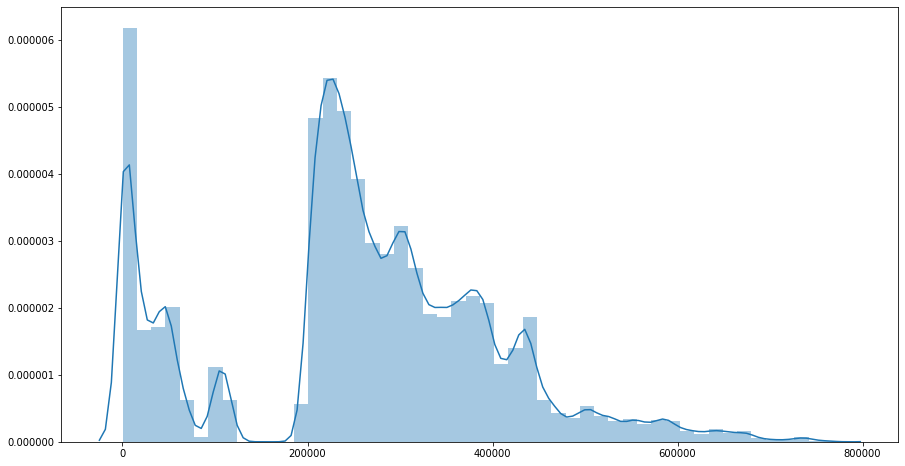

In [13]:
plt.subplots(figsize=(15,8))
sns.distplot(data_reviews.product_id.astype(int).values)

### ¿Cómo es la distribución de las calificaciones y horas jugadas?¿Pueden concluir algo de ese gráfico?

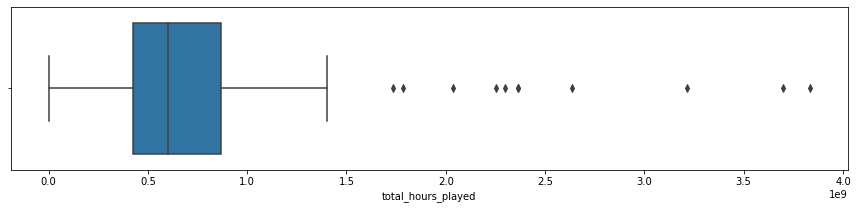

In [14]:
plt.subplots(figsize=(15,3))
#sns.boxplot(x=match['total_hours_played'])
sns.boxplot(x=match['total_hours_played'])

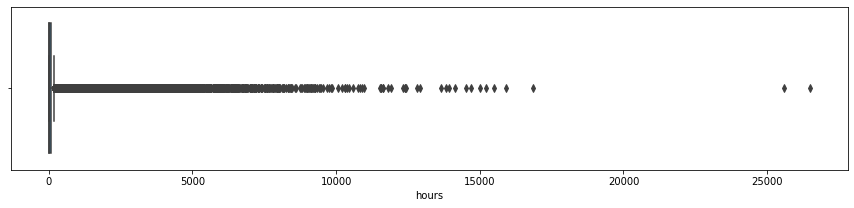

In [15]:
plt.subplots(figsize=(15,3))
sns.boxplot(x=data_reviews[~data_reviews['hours'].isna()]['hours'])

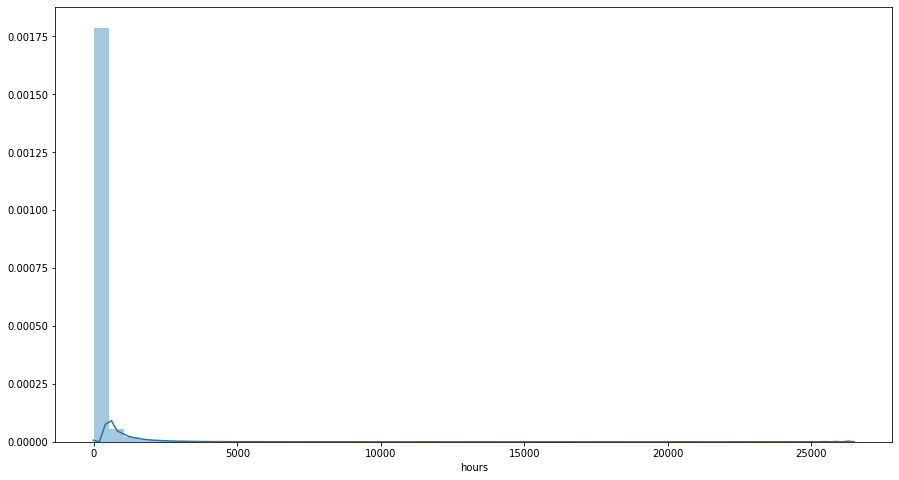

In [16]:
plt.subplots(figsize=(15,8))
sns.distplot(data_reviews[~data_reviews['hours'].isna()]['hours'])

In [17]:
valor_medio = data_reviews['hours'].mean()
std = data_reviews['hours'].std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers = np.logical_or(data_reviews['hours'] < minimo, data_reviews['hours'] > maximo)
print(valor_medio, std, minimo, maximo)

121.26549068384124 390.46328053736795 -1050.1243509282624 1292.655332295945


In [18]:
mascara_outliers.value_counts()

False    445375
True       7573
Name: hours, dtype: int64

In [19]:
data_reviews = data_reviews[~mascara_outliers]
data_reviews['hours'].describe()

count    444276.000000
mean         82.877335
std         174.037405
min           0.000000
25%           4.600000
50%          17.900000
75%          68.100000
max        1292.500000
Name: hours, dtype: float64

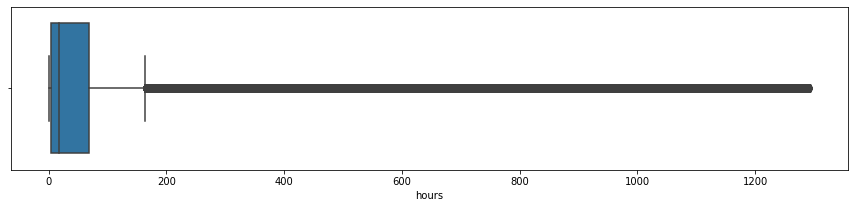

In [20]:
plt.subplots(figsize=(15,3))
sns.boxplot(x=data_reviews[~data_reviews['hours'].isna()]['hours'])

### Filtraremos los juegos jugados por más de 2 usuarios y por mas de 20 horas por usuario

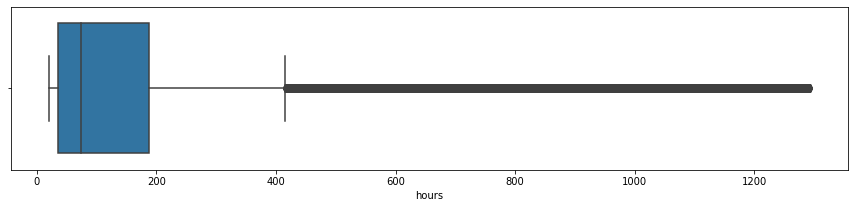

In [21]:
data_reviews = data_reviews[data_reviews['hours'] >= 20]
plt.subplots(figsize=(15,3))
sns.boxplot(x=data_reviews[~data_reviews['hours'].isna()]['hours'])

In [22]:
data_reviews.user_id.value_counts()

76561197969749884    93
76561198011965365    23
76561198010131631    16
76561198010800766    15
76561198014906902    12
                     ..
76561198044309628     1
76561198183184921     1
76561198390390526     1
76561197992739443     1
76561197979097438     1
Name: user_id, Length: 186853, dtype: int64

<font color=blue>

### Eliminaremos los juegos con pocos revews (menos de 2)

In [23]:
print(data_reviews.shape)
data_reviews = data_reviews.groupby('user_id').filter(lambda x: len(x) >= 2)
data_reviews.user_id.value_counts()
print(data_reviews.shape)

(212142, 12)
(44957, 12)


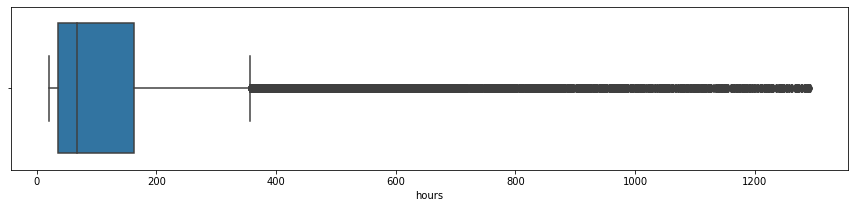

In [24]:
plt.subplots(figsize=(15,3))
sns.boxplot(x=data_reviews[~data_reviews['hours'].isna()]['hours'])

### ¿Cuál es el juego con más reviews?¿Cuántas tiene?¿Y el que menos calificaciones tiene?

In [25]:
match.iloc[0]

publisher                                                         Valve
genres                                           [Action, Free to Play]
app_name                                                Team Fortress 2
title                                                   Team Fortress 2
total_hours_played                                             11502040
url                   http://store.steampowered.com/app/440/Team_For...
release_date                                                 2007-10-10
tags                  [Free to Play, Multiplayer, FPS, Action, Shoot...
discount_price                                                      NaN
reviews_url           http://steamcommunity.com/app/440/reviews/?bro...
specs                 [Multi-player, Cross-Platform Multiplayer, Ste...
price                                                      Free to Play
early_access                                                      False
id                                                              

### Ordenamos los juegos por popularidad y le ponemos el nombre

In [26]:
match.head()

,publisher,genres,app_name,title,total_hours_played,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
31856,Valve,"[Action, Free to Play]",Team Fortress 2,Team Fortress 2,11502040,http://store.steampowered.com/app/440/Team_For...,2007-10-10,"[Free to Play, Multiplayer, FPS, Action, Shoot...",NaN,http://steamcommunity.com/app/440/reviews/?bro...,"[Multi-player, Cross-Platform Multiplayer, Ste...",Free to Play,False,440,Valve,Very Positive,92
29692,Facepunch Studios,"[Action, Adventure, Indie, Massively Multiplay...",Rust,Rust,3696958580,http://store.steampowered.com/app/252490/Rust/,2013-12-11,"[Early Access, Survival, Crafting, Multiplayer...",NaN,http://steamcommunity.com/app/252490/reviews/?...,"[Multi-player, MMO, Cross-Platform Multiplayer...",19.99,True,252490,Facepunch Studios,Very Positive,NaN
30746,"2K Games, Aspyr (Mac &amp;amp; Linux)","[Action, RPG]",Borderlands 2,Borderlands 2,513918560,http://store.steampowered.com/app/49520/Border...,2012-09-17,"[FPS, Co-op, Action, RPG, Loot, Shooter, Open ...",NaN,http://steamcommunity.com/app/49520/reviews/?b...,"[Single-player, Co-op, Steam Achievements, Ful...",19.99,False,49520,"Gearbox Software,Aspyr (Mac &amp; Linux)",Overwhelmingly Positive,89
25017,Bethesda Softworks,[RPG],Fallout 4,Fallout 4,3832322760,http://store.steampowered.com/app/377160/Fallo...,2015-11-09,"[Open World, Post-apocalyptic, Exploration, Si...",NaN,http://steamcommunity.com/app/377160/reviews/?...,"[Single-player, Steam Achievements, Full contr...",29.99,False,377160,Bethesda Game Studios,Mixed,84
26955,Rockstar Games,"[Action, Adventure]",Grand Theft Auto V,Grand Theft Auto V,2299824120,http://store.steampowered.com/app/271590/Grand...,2015-04-14,"[Open World, Action, Multiplayer, First-Person...",NaN,http://steamcommunity.com/app/271590/reviews/?...,"[Single-player, Multi-player, Steam Achievemen...",39.99,False,271590,Rockstar North,Mixed,96


In [27]:
data_games = data_games.rename(columns={'id':'product_id'})
data_reviews = data_reviews.merge(data_games, on='product_id', how='left')

# Transformaremos los tipos de datos
data_reviews.metascore = data_reviews.metascore.replace(['NA'],np.nan)
data_reviews.metascore = data_reviews.metascore.astype(np.float32)
data_reviews.product_id = data_reviews.product_id.astype(int) 
#data_reviews.user_id = data_reviews.user_id.astype(int) #OverflowError: Python int too large to convert to C long

data_reviews.metascore.value_counts()

84.0    2571
81.0    2122
88.0    1879
89.0    1840
92.0    1715
        ... 
48.0       2
27.0       1
20.0       1
50.0       1
24.0       1
Name: metascore, Length: 61, dtype: int64

In [28]:
# Eliminaremos los valores faltatentes

print(data_reviews.shape)
data_reviews = data_reviews[~data_reviews.metascore.isna()]
print(data_reviews.shape)

(44987, 27)
(31035, 27)


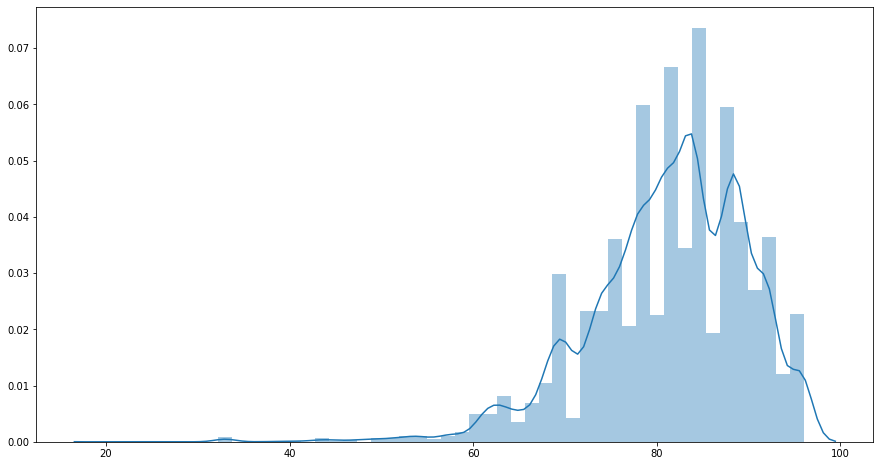

In [29]:
plt.subplots(figsize=(15,8))
sns.distplot(data_reviews.metascore.astype(int).values)

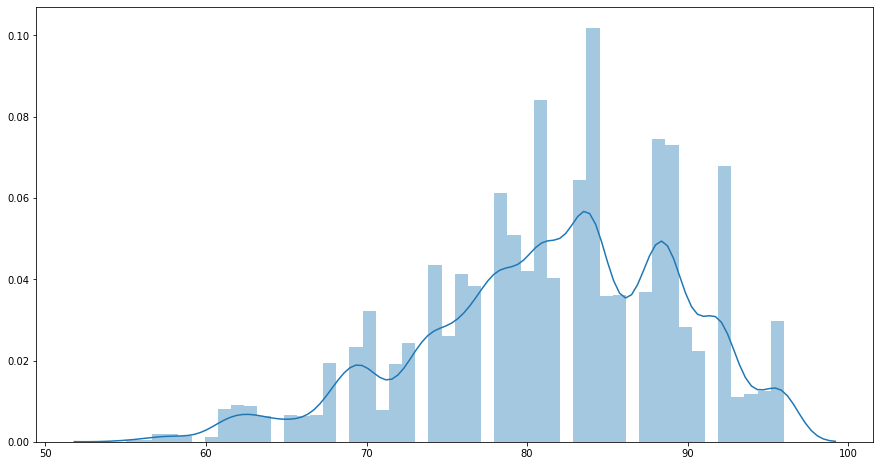

In [30]:
data_reviews = data_reviews[data_reviews.metascore >= 55]
plt.subplots(figsize=(15,8))
sns.distplot(data_reviews.metascore.astype(int).values)

In [31]:
data_reviews = data_reviews.drop(columns=['products','page_order','date','text','early_access_x','page','found_funny','compensation','publisher','app_name','url','release_date','tags','discount_price','reviews_url','specs','early_access_y','developer','sentiment'])
data_reviews.head(2)

,username,hours,product_id,user_id,genres,title,price,metascore
0,Kevin Droid,21.6,35140,76561198030870442,"[Action, Adventure]",Batman: Arkham Asylum Game of the Year Edition,19.99,91.0
3,tung.tungnguyen trade.tf,114.8,271590,76561198211759421,"[Action, Adventure]",Grand Theft Auto V,39.99,96.0


In [32]:
data_reviews.to_csv('data_reviews 22 12 2020.csv', sep=',')

In [33]:
data_games = data_games[~data_games.product_id.isna()]
data_games.product_id = data_games.product_id.astype(int)
#data_reviews.product_id = data_reviews.product_id.replace(['NA'],np.nan)

# Entrenamiento

Para entrenar el sistema de recomendación vamos a usar la biblioteca Surprise. Recomendamos tener abierta la [documentación](https://surprise.readthedocs.io/en/stable/getting_started.html) a medida que van a través de este notebook.

### Dataset y Train/test split

Primero, llevamos el dataset al formato que le gusta a la biblioteca. ¿En qué orden tienen que estar los atributos?. Investigar qué hace la clase `Reader` y cuáles son sus parámetros.

In [62]:
!pip install surprise
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split

N_filas = 100000 # Limitamos el dataset a N_filas

reader = Reader(rating_scale=(1, 100))

df1 = data_reviews.copy()
df1 = df1.drop(['metascore','genres','title','title','price'], axis=1)
df1.head(2)

,username,hours,product_id,user_id
0,Kevin Droid,21.6,35140,76561198030870442
3,tung.tungnguyen trade.tf,114.8,271590,76561198211759421


In [63]:
#data_games_train = data_games[['id','metascore']].rename(columns={'id':'product_id'}).dropna()
data_games_train = data_games.copy()
data_games.head(2)

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,product_id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN


In [64]:
df1= pd.merge(df1, data_games_train, on='product_id', how='inner')
df1.head(2)

,username,hours,product_id,user_id,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,developer,sentiment,metascore
0,Kevin Droid,21.6,35140,76561198030870442,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,http://store.steampowered.com/app/35140/Batman...,2010-03-26,"[Action, Batman, Stealth, Adventure, Third Per...",NaN,http://steamcommunity.com/app/35140/reviews/?b...,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91
1,Fugitive Mind,20.7,35140,76561198105445916,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,http://store.steampowered.com/app/35140/Batman...,2010-03-26,"[Action, Batman, Stealth, Adventure, Third Per...",NaN,http://steamcommunity.com/app/35140/reviews/?b...,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91


In [65]:
df1['user_id'] = df1['user_id'].dropna()
df1 = df1[~df1['user_id'].isnull()]
df1 = df1[df1['metascore']!='NA']
#df1['metascore']=df1['metascore']*5/100
df1.head(2)

,username,hours,product_id,user_id,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,developer,sentiment,metascore
0,Kevin Droid,21.6,35140,76561198030870442,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,http://store.steampowered.com/app/35140/Batman...,2010-03-26,"[Action, Batman, Stealth, Adventure, Third Per...",NaN,http://steamcommunity.com/app/35140/reviews/?b...,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91
1,Fugitive Mind,20.7,35140,76561198105445916,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,http://store.steampowered.com/app/35140/Batman...,2010-03-26,"[Action, Batman, Stealth, Adventure, Third Per...",NaN,http://steamcommunity.com/app/35140/reviews/?b...,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91


In [38]:
#df1 = df1['user_id'].dropna()
data = Dataset.load_from_df(df1[['user_id', 'product_id', 'metascore']][:N_filas], reader)
data

In [39]:
trainset, testset = train_test_split(data, test_size=.25)
print(trainset)

In [40]:
from surprise import SVD
algo = SVD()
algo.fit(trainset)

In [41]:
predictions = algo.test(testset)
predictions[0]

Prediction(uid='76561198342073920', iid=346110, r_ui=70.0, est=70.46097820835678, details={'was_impossible': False})

In [42]:
df1[['user_id', 'product_id', 'hours']][:N_filas][df1['user_id']=='76561198081185466']

,user_id,product_id,hours
1567,76561198081185466,48700,274.7
4737,76561198081185466,360430,30.5
17541,76561198081185466,242860,70.9


In [43]:
predictions

[Prediction(uid='76561198342073920', iid=346110, r_ui=70.0, est=70.46097820835678, details={'was_impossible': False}),
 Prediction(uid='76561198093738069', iid=234140, r_ui=73.0, est=73.45608895971883, details={'was_impossible': False}),
 Prediction(uid='76561198065706011', iid=200510, r_ui=89.0, est=88.89933056888042, details={'was_impossible': False}),
 Prediction(uid='76561198190450498', iid=232090, r_ui=75.0, est=75.39927242844885, details={'was_impossible': False}),
 Prediction(uid='76561198204555943', iid=440, r_ui=92.0, est=91.8398865696381, details={'was_impossible': False}),
 Prediction(uid='76561198355212195', iid=440, r_ui=92.0, est=91.78948906756231, details={'was_impossible': False}),
 Prediction(uid='76561198081275959', iid=374320, r_ui=89.0, est=88.7865034115663, details={'was_impossible': False}),
 Prediction(uid='76561198054678192', iid=208140, r_ui=77.0, est=77.47202512523059, details={'was_impossible': False}),
 Prediction(uid='76561198129227013', iid=291650, r_ui=89

### Usuarios con mayor cantidad de reviews

In [44]:
data_reviews.user_id.value_counts()

76561197969749884    56
76561198010800766    13
76561198011965365    11
76561198043627942    10
76561198010131631    10
                     ..
76561198188342095     1
76561198015355376     1
76561197970708144     1
76561198083876634     1
76561198061249750     1
Name: user_id, Length: 16763, dtype: int64

In [45]:
data_reviews[data_reviews.user_id=='76561197969749884'].head(3)

,username,hours,product_id,user_id,genres,title,price,metascore
177,Sarkoth,53.9,234710,76561197969749884,"[Casual, Sports]",Poker Night 2,4.99,75.0
284,Sarkoth,67.4,308420,76561197969749884,"[Action, Indie, RPG]",Ziggurat,14.99,75.0
962,Sarkoth,49.2,204530,76561197969749884,"[Action, Indie, Strategy]",Infested Planet,14.99,75.0


In [46]:
data_games[data_games.product_id==234710]

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,product_id,developer,sentiment,metascore
1362,Telltale Games,"[Casual, Sports]",Poker Night 2,Poker Night 2,http://store.steampowered.com/app/234710/Poker...,2013-04-26,"[Casual, Card Game, Comedy, Singleplayer, Gamb...",NaN,http://steamcommunity.com/app/234710/reviews/?...,"[Single-player, Full controller support]",4.99,False,234710,Telltale Games,Very Positive,75


In [47]:
algo.predict(76561197969749884,234710)

Prediction(uid=76561197969749884, iid=234710, r_ui=None, est=81.44996492424637, details={'was_impossible': False})

### ¿Que signifca esta predicción?

Exploremos un usuario, veamos cuáles juegos le gustaron y cuáles les recomienda el sistema.

Juegos que le gustaron

In [48]:
usuario = '76561197969749884'
#metascore = 70*5/100 
#df_user = df1[(df1['user_id'] == usuario) & (df1['metascore'] >= metascore)]
df_user = df1[(df1['user_id'] == usuario) & (df1['metascore'] >= 70.0)]
df_user = df_user.reset_index(drop=True)
df_user.metascore.describe()

count     44
unique    19
top       75
freq       6
Name: metascore, dtype: int64

Creamos un dataframe en donde vamos a guardar las recomendaciones

In [49]:
recomendaciones_usuario = data_games[['title','product_id']].iloc[:4499].copy()
recomendaciones_usuario.index = recomendaciones_usuario.product_id
recomendaciones_usuario = recomendaciones_usuario.drop(['product_id'], axis=1)
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(4499, 1)


,title
product_id,
761140,Lost Summoner Kitty
643980,Ironbound
670290,Real Pool 3D - Poolians
767400,弹炸人2222
773570,NaN


In [50]:
usuario_vistas = df1[['user_id', 'product_id', 'metascore']][df1['user_id'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(56, 3)


,user_id,product_id,metascore
762,76561197969749884,234710,75
896,76561197969749884,308420,75
1660,76561197969749884,204530,75
1876,76561197969749884,214340,74
2091,76561197969749884,18120,73


In [51]:
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario.head()

,product_id,title
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,773570,NaN


Y hacemos las recomendaciones

In [52]:
recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['product_id'].apply(lambda x: algo.predict(usuario, x).est)

In [53]:
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
print(recomendaciones_usuario.head(10))

      product_id                                              title  \
556        12120                      Grand Theft Auto: San Andreas   
188        22000                                       World of Goo   
95          7670                                          BioShock™   
631          620                                           Portal 2   
253        22320  The Elder Scrolls III: Morrowind® Game of the ...   
252        22330  The Elder Scrolls IV: Oblivion® Game of the Ye...   
4366      391540                                          Undertale   
2653      240760                        Wasteland 2: Director's Cut   
493         8930                        Sid Meier's Civilization® V   
28            70                                          Half-Life   

      Estimate_Score  
556        90.958933  
188        90.342386  
95         90.189218  
631        90.119133  
253        89.093772  
252        88.712217  
4366       87.307339  
2653       86.975499  
493        

In [54]:
recomendaciones_usuario.shape

(4499, 3)

In [55]:
recomendaciones_usuario.Estimate_Score.describe()

count    4499.000000
mean       77.704996
std         1.256787
min        54.496286
25%        77.801028
50%        77.801028
75%        77.801028
max        90.958933
Name: Estimate_Score, dtype: float64

###  Evaluación

Para el conjunto de `testset`, evaluamos el error RMSE entre las predicciones y las verdaderas calificaciones que le habían dado a las películas. Para eso, buscar en la documentación cómo se hace

In [56]:
from surprise import accuracy

accuracy.rmse(predictions)

RMSE: 3.1227


3.122680820362312

### Optimización de parámetros

In [57]:
from surprise.model_selection import cross_validate

rmse_test_means = []
factores = [1,2,4,8,16,32,64,128,256]

for factor in factores:
    print(factor)
    algo = SVD(n_factors=factor)
    cv = cross_validate(algo, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.6451  2.7343  2.7559  2.7118  0.0479  
Fit time          0.27    0.26    0.26    0.26    0.00    
Test time         0.06    0.13    0.06    0.08    0.03    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.7678  2.6919  2.7702  2.7433  0.0363  
Fit time          0.28    0.28    0.30    0.29    0.01    
Test time         0.05    0.07    0.06    0.06    0.01    
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.8241  2.7759  2.6694  2.7565  0.0646  
Fit time          0.30    0.31    0.31    0.31    0.00    
Test time         0.05    0.06    0.06    0.05    0.01    
8
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.7667  2.7

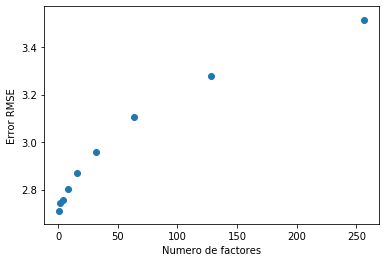

In [58]:
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [5,50,100],'n_epochs': [5, 10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

In [59]:
rmse_test_means = []
factores = [1,2,4,5,8,16,32,64,128,256]

for factor in factores:
    print(factor)
    algo = SVD(n_factors=factor, n_epochs=20, lr_all=0.005, reg_all=0.002)
    cv = cross_validate(algo, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.7885  2.6763  2.7090  2.7246  0.0471  
Fit time          0.27    0.26    0.29    0.28    0.01    
Test time         0.06    0.06    0.06    0.06    0.00    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.7737  2.7429  2.5933  2.7033  0.0788  
Fit time          0.29    0.28    0.30    0.29    0.01    
Test time         0.06    0.06    0.05    0.06    0.01    
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.8057  2.8506  2.6081  2.7548  0.1053  
Fit time          0.31    0.30    0.30    0.30    0.00    
Test time         0.06    0.07    0.13    0.09    0.03    
5
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    2.7528  2.7

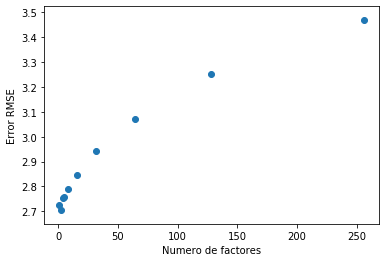

In [60]:
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

## Con estos parámetros, reentrenaremos y mediremos las recomendaciones:

In [66]:
reader = Reader(rating_scale=(1, 100))

#df1 = data_reviews.copy()
#df1= pd.merge(df1, data_games_train, on='product_id', how='inner')
#df1['user_id'] = df1['user_id'].dropna()
#df1 = df1[~df1['user_id'].isnull()]
#df1 = df1[df1['metascore']!='NA']
#df1['metascore']=df1['metascore']*5/100
data = Dataset.load_from_df(df1[['user_id', 'product_id', 'metascore']][:N_filas], reader)
data

In [67]:
trainset, testset = train_test_split(data, test_size=.25)
algo = SVD(n_factors=5, n_epochs=20, lr_all=0.005, reg_all=0.002)
algo.fit(trainset)
predictions = algo.test(testset)
predictions

[Prediction(uid='76561197979353861', iid=262060, r_ui=84.0, est=83.3658847912473, details={'was_impossible': False}),
 Prediction(uid='76561198058348813', iid=203770, r_ui=82.0, est=82.04898164132628, details={'was_impossible': False}),
 Prediction(uid='76561198085919942', iid=360430, r_ui=62.0, est=62.56669899472389, details={'was_impossible': False}),
 Prediction(uid='76561198143156438', iid=405900, r_ui=74.0, est=75.3887361784915, details={'was_impossible': False}),
 Prediction(uid='76561198211636324', iid=262060, r_ui=84.0, est=84.04768665258405, details={'was_impossible': False}),
 Prediction(uid='76561198067198869', iid=4760, r_ui=92.0, est=91.06705396520724, details={'was_impossible': False}),
 Prediction(uid='76561198258088545', iid=394360, r_ui=83.0, est=83.01740322274692, details={'was_impossible': False}),
 Prediction(uid='76561198009514092', iid=19900, r_ui=85.0, est=83.36589019154385, details={'was_impossible': False}),
 Prediction(uid='76561198093833209', iid=107410, r_ui

In [70]:
usuario = 76561198011965365
metascore = 70*5/100   # le pedimos peliculas a las que haya puesto 4 o 5 estrellas
df_user = df1[(df1['user_id'] == usuario) & (df1['metascore'] >= metascore)]
df_user = df_user.reset_index(drop=True)
#df_user['username'] = data_reviews['username'].loc[data_reviews.product_id].values

recomendaciones_usuario = data_games[['title','product_id']].iloc[:4499].copy()
recomendaciones_usuario.index = recomendaciones_usuario.product_id
recomendaciones_usuario = recomendaciones_usuario.drop(['product_id'], axis=1)
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(4499, 1)


,title
product_id,
761140,Lost Summoner Kitty
643980,Ironbound
670290,Real Pool 3D - Poolians
767400,弹炸人2222
773570,NaN


In [71]:
usuario_vistas = df1[['user_id', 'product_id', 'metascore']][df1['user_id'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(0, 3)


,user_id,product_id,metascore


In [72]:
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario.head()

,product_id,title
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,773570,NaN


In [74]:
recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['product_id'].apply(lambda x: algo.predict(usuario, x).est)

In [75]:
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
print(recomendaciones_usuario.head(10))

      product_id                                              title  \
631          620                                           Portal 2   
95          7670                                          BioShock™   
28            70                                          Half-Life   
252        22330  The Elder Scrolls IV: Oblivion® Game of the Ye...   
556        12120                      Grand Theft Auto: San Andreas   
4366      391540                                          Undertale   
98          4760                      Rome: Total War™ - Collection   
1672      238010         Deus Ex: Human Revolution - Director's Cut   
358        22370                Fallout 3: Game of the Year Edition   
493         8930                        Sid Meier's Civilization® V   

      Estimate_Score  
631        94.904775  
95         94.790376  
28         94.674737  
252        93.837566  
556        92.253972  
4366       91.936984  
98         91.630034  
1672       90.828087  
358        

In [78]:
match=pd.DataFrame()
for i in range(0,len(data_reviews[data_reviews.user_id=='76561198011965365'])):
    match=match.append(data_games[data_games.product_id==data_reviews[data_reviews.user_id=='76561198011965365'].product_id.values[i]])
match[['product_id','title','metascore','tags']].head()

,product_id,title,metascore,tags
751,45770,Dead Rising 2: Off the Record,66,"[Action, Zombies, Adventure, Open World, Onlin..."
204,9480,Saints Row 2,72,"[Open World, Action, Sandbox, Character Custom..."
723,63940,Men of War: Vietnam,68,"[Strategy, RTS, War, Tactical, Real Time Tacti..."
31771,17460,Mass Effect,89,"[RPG, Sci-fi, Story Rich, Action, Third-Person..."
31095,105450,Age of Empires® III: Complete Collection,81,"[Strategy, RTS, Base Building, Historical, Mul..."


### Parece que la predicción sigue sin funcionar.

In [79]:
accuracy.rmse(predictions)

RMSE: 2.6582


2.658191047893797

<font color=blue>

### Pendiente: Análisis de la metodología ¿cumple con los pasos necesarios para la ciencia de datos?

### Filtro Colaborativo

Deberás implementar un sistema de recomendación colaborativo para este dataset. Ten en cuenta:

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.

Puedes implementar un filtro colaborativo a partir de la similitud coseno o índice de Jaccard. ¿Puedes utilizar los métodos de la librería Surprise? Si no es así, busca implementaciones (por ejemplo, nuevas librerías) que sean apropiadas.

Para comenzar a trabajar, puedes asumir que cada entrada es un enlace entre una persona usuaria y un item, **independientemente** de si la crítica es buena o mala. 

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo harías para ponerle un valor a la calificación?
1. ¿Cómo harías para agregar contenido? Por ejemplo, cuentas con el género, precio, fecha de lanzamiento y más información de los juegos.
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### Implementaremos un sistema de recomendación colaborativo para este dataset, usando similitud de coseno

https://pankaj-tiwari2.medium.com/neighborhood-based-collaborative-filtering-in-python-using-surprise-fe9d5700cb58

In [80]:
import pandas as pd
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise.model_selection import KFold
from surprise import Reader
from surprise import NormalPredictor
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
from surprise.model_selection import GridSearchCV

### Eligiremos como target el metascore

### Usaremos KNN como benchmark de SVD

#### Crearemos un anti_set, que consiste de los pares de usuarios y juegos que no existen en el dataset original. Este es el set en el cual desemos predecir los metascores.

In [81]:
data_final = data_reviews[['user_id', 'product_id', 'metascore']][:100000]
reader = Reader(rating_scale=(1, 100))
# The columns must correspond to user id, item id and metascores (in that order).
data = Dataset.load_from_df(data_final, reader)
anti_set = data.build_full_trainset().build_anti_testset()
anti_set

[('76561198030870442', 271590, 81.5767042683918),
 ('76561198030870442', 452570, 81.5767042683918),
 ('76561198030870442', 8880, 81.5767042683918),
 ('76561198030870442', 61700, 81.5767042683918),
 ('76561198030870442', 214560, 81.5767042683918),
 ('76561198030870442', 369990, 81.5767042683918),
 ('76561198030870442', 241620, 81.5767042683918),
 ('76561198030870442', 32900, 81.5767042683918),
 ('76561198030870442', 13600, 81.5767042683918),
 ('76561198030870442', 330390, 81.5767042683918),
 ('76561198030870442', 337000, 81.5767042683918),
 ('76561198030870442', 274230, 81.5767042683918),
 ('76561198030870442', 260550, 81.5767042683918),
 ('76561198030870442', 1610, 81.5767042683918),
 ('76561198030870442', 17450, 81.5767042683918),
 ('76561198030870442', 258010, 81.5767042683918),
 ('76561198030870442', 23450, 81.5767042683918),
 ('76561198030870442', 603960, 81.5767042683918),
 ('76561198030870442', 233270, 81.5767042683918),
 ('76561198030870442', 350280, 81.5767042683918),
 ('765611

#### Lo normal para el antiset es que genere para cada usuario o juego faltante, un metascore promedio correspondiente

In [82]:
games = data_reviews[['product_id' , 'title']].drop_duplicates(['product_id' , 'title'])
users = data_reviews[['user_id' , 'username']].drop_duplicates(['user_id' , 'username'])

#### Usaremos vecinos mas cercanos como primer modelo, pero es necesario probar con SVD

In [83]:
kf = KFold(n_splits=3)
algo = KNNBasic()
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_algo = algo
        best_pred = predictions

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 6.8775
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 6.8226
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 6.8865


#### Según la referencia que usamos, el RMSE que estamos obteniendo resulta alto. La guía obtiene uno de entre 2,55 y 1,39. Nosotros estamos a más de el doble

https://gist.github.com/pankajti/e631e8f6ce067fc76dfacedd9e4923ca#file-surprise_knn_recommendation-ipynb

In [84]:
best_pred

[Prediction(uid='76561197961102572', iid=228400, r_ui=77.0, est=81.56397503413302, details={'was_impossible': True, 'reason': 'Not enough neighbors.'}),
 Prediction(uid='76561198042100336', iid=271590, r_ui=96.0, est=96.0, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='76561198009630980', iid=281990, r_ui=78.0, est=78.0, details={'actual_k': 6, 'was_impossible': False}),
 Prediction(uid='76561198196607838', iid=612880, r_ui=86.0, est=86.0, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='76561198016735960', iid=239350, r_ui=90.0, est=81.56397503413302, details={'was_impossible': True, 'reason': 'Not enough neighbors.'}),
 Prediction(uid='76561197996007663', iid=8190, r_ui=84.0, est=84.0, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='76561197983154023', iid=230190, r_ui=65.0, est=81.56397503413302, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='76561198018250130', iid=200510, r_

In [85]:
kf = KFold(n_splits=5)
sim_options = {'name':'cosine'}
algo = KNNWithMeans(sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_algo = algo
        best_rmse= rmse
        best_pred = predictions
print(best_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 8.0501
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 7.8976
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 8.0426
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 7.9928
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 7.9596
7.897611164239094


In [86]:
best_pred

[Prediction(uid='76561197970727958', iid=107200, r_ui=74.0, est=83.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='76561198059837793', iid=243470, r_ui=77.0, est=81.16666666666666, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='76561198019743056', iid=268500, r_ui=88.0, est=90.1625, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='76561197981403990', iid=8930, r_ui=90.0, est=81.59640781827787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='76561198064965331', iid=268500, r_ui=88.0, est=81.59640781827787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='76561198029567553', iid=4500, r_ui=82.0, est=78.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='76561198140452760', iid=311210, r_ui=73.0, est=71.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='76561198008447684', iid=346940, r_ui=81.0, es

### Usando opciones de similitud de coseno en el algoritmo

In [87]:
sim_options = {'name': 'cosine' ,'user_based':  False}
kf = KFold(n_splits=5)
algo = KNNWithMeans(k =3 , sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_rmse= rmse
        best_algo = algo
        best_pred = predictions

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.4810
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.6940
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.8060
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.6452
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 4.5751


### Gridsearch KNN

In [88]:
param_grid = {'n_factors': [3,4,5,50,100],'n_epochs': [3,4,5,10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

8.142219626441689
{'n_factors': 3, 'n_epochs': 3, 'lr_all': 0.001, 'reg_all': 0.002}


In [89]:
param_grid = {'n_factors': [3,4,5,50,100],'n_epochs': [3,4,5,10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

3.0099972291641968
{'n_factors': 3, 'n_epochs': 3, 'lr_all': 0.001, 'reg_all': 0.002}


In [90]:
# Usar parámetros del gridsearch

sim_options = {'name': 'cosine' ,'user_based':  False}
kf = KFold(n_splits=5)
algo = KNNBaseline(k =3 , sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_rmse= rmse
        best_algo = algo
        best_pred = predictions

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.0064
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.9354
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.8841
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.8604
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.9210


### Análisis de predicciones para datos conocidos

In [91]:
pred_df = pd.DataFrame(best_pred).merge(data_reviews , left_on = ['uid', 'iid'], right_on = ['user_id', 'product_id'])
pred_df[['uid', 'iid',  'username', 'user_id', 'title', 'product_id', 'est','metascore']]

,uid,iid,username,user_id,title,product_id,est,metascore
0,76561197961569797,374320,Valravn,76561197961569797,DARK SOULS™ III,374320,88.436900,89.0
1,76561197968514473,257870,Meat-King©®,76561197968514473,Eschalon: Book III,257870,78.011688,67.0
2,76561198028319169,377160,[3CIB]clpfox,76561198028319169,Fallout 4,377160,84.352815,84.0
3,76561197984478327,245170,Skeptic Gamer,76561197984478327,Skullgirls,245170,82.655452,83.0
4,76561198058034222,220240,{cNc}BunnyGod,76561198058034222,Far Cry 3,220240,89.225012,88.0
...,...,...,...,...,...,...,...,...
7553,76561197982791484,39210,PrettyPancake,76561197982791484,FINAL FANTASY XIV Online,39210,82.506946,83.0
7554,76561197975584561,268500,Yaniv,76561197975584561,XCOM® 2,268500,89.441306,88.0
7555,76561197970655641,232090,Speerhagel,76561197970655641,Killing Floor 2,232090,75.374932,75.0
7556,76561198129943042,200210,thelilbittydragon,76561198129943042,Realm of the Mad God,200210,82.063457,82.0


### Análisis de predicciones para datos desconocidos

In [92]:
anti_pre = best_algo.test(anti_set)
pred_df = pd.DataFrame(anti_pre).merge(games , left_on = ['iid'], right_on = ['product_id'])
pred_df = pd.DataFrame(pred_df).merge(users , left_on = ['uid'], right_on = ['user_id'])
pred_df

,uid,iid,r_ui,est,details,product_id,title,user_id,username
0,76561198030870442,271590,81.576704,95.628707,{'was_impossible': False},271590,Grand Theft Auto V,76561198030870442,Kevin Droid
1,76561198030870442,452570,81.576704,81.460527,{'was_impossible': False},452570,Battle Chef Brigade,76561198030870442,Kevin Droid
2,76561198030870442,8880,81.576704,82.310296,{'was_impossible': False},8880,Freedom Force,76561198030870442,Kevin Droid
3,76561198030870442,61700,81.576704,80.060166,{'was_impossible': False},61700,Might &amp; Magic: Clash of Heroes,76561198030870442,Kevin Droid
4,76561198030870442,214560,81.576704,87.730688,{'was_impossible': False},214560,Mark of the Ninja,76561198030870442,Kevin Droid
...,...,...,...,...,...,...,...,...,...
21666625,76561198202999756,337850,81.576704,80.839542,"{'actual_k': 0, 'was_impossible': False}",337850,Avernum 2: Crystal Souls,76561198202999756,Mr.Duwang Man
21666626,76561198202999756,232910,81.576704,80.634707,"{'actual_k': 0, 'was_impossible': False}",232910,TrackMania² Stadium,76561198202999756,Mr.Duwang Man
21666627,76561198202999756,253840,81.576704,80.758066,"{'actual_k': 0, 'was_impossible': False}",253840,Shantae: Half-Genie Hero,76561198202999756,Mr.Duwang Man
21666628,76561198202999756,554620,81.576704,80.787139,"{'actual_k': 2, 'was_impossible': False}",554620,Life is Strange: Before the Storm,76561198202999756,Mr.Duwang Man


In [93]:
pred_df[(pred_df['est']>70.0)&(pred_df['user_id']=='76561198353396844')]

,uid,iid,r_ui,est,details,product_id,title,user_id,username
14408751,76561198353396844,271590,81.576704,95.619022,"{'actual_k': 0, 'was_impossible': False}",271590,Grand Theft Auto V,76561198353396844,the_maker988
14408752,76561198353396844,452570,81.576704,81.450841,"{'actual_k': 0, 'was_impossible': False}",452570,Battle Chef Brigade,76561198353396844,the_maker988
14408753,76561198353396844,8880,81.576704,82.300610,"{'actual_k': 0, 'was_impossible': False}",8880,Freedom Force,76561198353396844,the_maker988
14408754,76561198353396844,61700,81.576704,80.050480,"{'actual_k': 0, 'was_impossible': False}",61700,Might &amp; Magic: Clash of Heroes,76561198353396844,the_maker988
14408755,76561198353396844,214560,81.576704,87.721002,"{'actual_k': 0, 'was_impossible': False}",214560,Mark of the Ninja,76561198353396844,the_maker988
...,...,...,...,...,...,...,...,...,...
14410037,76561198353396844,337850,81.576704,80.786175,"{'actual_k': 0, 'was_impossible': False}",337850,Avernum 2: Crystal Souls,76561198353396844,the_maker988
14410038,76561198353396844,232910,81.576704,80.581340,"{'actual_k': 0, 'was_impossible': False}",232910,TrackMania² Stadium,76561198353396844,the_maker988
14410039,76561198353396844,253840,81.576704,80.704699,"{'actual_k': 0, 'was_impossible': False}",253840,Shantae: Half-Genie Hero,76561198353396844,the_maker988
14410040,76561198353396844,554620,81.576704,80.406160,"{'actual_k': 0, 'was_impossible': False}",554620,Life is Strange: Before the Storm,76561198353396844,the_maker988


In [94]:
pred_df['user_id'].value_counts()

76561198238638452    2582
76561198097138610    2582
76561198321456036    2582
76561198117493111    2582
76561198060474037    2582
                     ... 
76561198010131631    1283
76561198043627942    1283
76561198011965365    1282
76561198010800766    1280
76561197969749884    1238
Name: user_id, Length: 16763, dtype: int64

In [95]:
pred_df['username'].value_counts().unique()

array([9041, 9040, 6459, 6457, 5167, 5166, 5165, 5164, 5163, 3876, 3875,
       3874, 3873, 3872, 2584, 2583, 2582, 2581, 2580, 2579, 1292, 1291,
       1290, 1289, 1288, 1287, 1286, 1285, 1284, 1283, 1282, 1280, 1238],
      dtype=int64)

In [96]:
pred_df[(pred_df['est']>70.0)&(pred_df['user_id']=='76561197990406921')]

,uid,iid,r_ui,est,details,product_id,title,user_id,username
169027,76561197990406921,271590,81.576704,95.455276,"{'actual_k': 0, 'was_impossible': False}",271590,Grand Theft Auto V,76561197990406921,MMG Man
169028,76561197990406921,452570,81.576704,81.287096,"{'actual_k': 0, 'was_impossible': False}",452570,Battle Chef Brigade,76561197990406921,MMG Man
169029,76561197990406921,8880,81.576704,82.136865,"{'actual_k': 0, 'was_impossible': False}",8880,Freedom Force,76561197990406921,MMG Man
169030,76561197990406921,61700,81.576704,79.886735,"{'actual_k': 0, 'was_impossible': False}",61700,Might &amp; Magic: Clash of Heroes,76561197990406921,MMG Man
169031,76561197990406921,214560,81.576704,87.557257,"{'actual_k': 0, 'was_impossible': False}",214560,Mark of the Ninja,76561197990406921,MMG Man
...,...,...,...,...,...,...,...,...,...
170308,76561197990406921,6840,81.576704,81.413468,{'was_impossible': False},6840,Commandos 3: Destination Berlin,76561197990406921,MMG Man
170309,76561197990406921,337850,81.576704,80.622429,"{'actual_k': 0, 'was_impossible': False}",337850,Avernum 2: Crystal Souls,76561197990406921,MMG Man
170310,76561197990406921,232910,81.576704,80.417594,"{'actual_k': 0, 'was_impossible': False}",232910,TrackMania² Stadium,76561197990406921,MMG Man
170311,76561197990406921,253840,81.576704,80.540954,"{'actual_k': 0, 'was_impossible': False}",253840,Shantae: Half-Genie Hero,76561197990406921,MMG Man


In [ ]:
#pred_df.to_csv('pred_df 19 12 2020.csv', sep=',')

### Encontrando los vecinos más cercanos de un juego

In [97]:
data_games[data_games.product_id=='440'].head(3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,product_id,developer,sentiment,metascore


In [98]:
tsr_inner_id = best_algo.trainset.to_inner_iid(440)
tsr_neighbors = best_algo.get_neighbors(tsr_inner_id, k=4)
games[games.product_id.isin([algo.trainset.to_raw_iid(inner_id)
                       for inner_id in tsr_neighbors])]

,product_id,title
3,271590,Grand Theft Auto V
27235,230410,Warframe
38928,236430,DARK SOULS™ II
41891,391540,Undertale


In [99]:
data_reviews.nlargest(3, 'metascore')

,username,hours,product_id,user_id,genres,title,price,metascore
3,tung.tungnguyen trade.tf,114.8,271590,76561198211759421,"[Action, Adventure]",Grand Theft Auto V,39.99,96.0
17,philmont,111.7,271590,76561197977483812,"[Action, Adventure]",Grand Theft Auto V,39.99,96.0
32,Moebius Teras,35.5,271590,76561198020718137,"[Action, Adventure]",Grand Theft Auto V,39.99,96.0


<font color=blue>

### Pendiente: Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.


<font color=blue>

### Pendiente: comparar resultados de SVD con KNN, de forma gráfica

<font color=blue>

### ¿Cómo harías para agregar contenido? Por ejemplo, cuentas con el género, precio, fecha de lanzamiento y más información de los juegos.


<font color=blue>

### Pendiente: Crear y responder con el dataset al menos 1 pregunta original/propia

### Propuesta: ¿como ir más allá del metascore en los features del modelo? ¿como usar las horas jugadas y el tag/género? R: Filtrar primero el dataset por género/etiqueta, entrenando el modelo con esos datos y luego arrojando una predicción

<font color=blue>

### Comentar sobre la predicción final vs la expectativa. Cuantificar la expectativa

#### Quizá sea necesario balancear el hecho que algunos usuarios aportan más datos que otros (califican más juegos, generan mas horas y metascore) mediante la sustracción del metascore medio del usuario de todas las calificaciones del mismo

<font color=blue>

### Crear una propuesta a probar luego sobre estos datos para la próxima entrega

### Propuesta: Usar el texto de dejó el usuario al calificar, para mejorar el sistema de recomendación, usado librerías de procesamiento de lenguaje natural